#### <i> Import Library Files</i>
#### <i> Dataset Links --> https://www.kaggle.com/datasets/abdullah0a/telecom-customer-churn-insights-for-analysis </i>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

#### <i> Load The Dataset </i>

In [25]:
data = pd.read_csv("customer_churn_data.csv")
data

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes
...,...,...,...,...,...,...,...,...,...,...
995,996,42,Male,41,37.14,Month-to-Month,Fiber Optic,1522.74,Yes,Yes
996,997,62,Male,9,80.93,Month-to-Month,NaN,728.37,No,Yes
997,998,51,Female,15,111.72,Month-to-Month,Fiber Optic,1675.80,Yes,Yes
998,999,39,Male,68,65.67,One-Year,NaN,4465.56,No,Yes


#### <i> Dataset OVerview </i>

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [27]:
data.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### <i> Data Preprocessing </i>

In [29]:
# 1. Handle missing values
# InternetService has missing values
# Fill missing values with the mode
data['InternetService'].fillna(data['InternetService'].mode()[0], inplace=True)

# 2. Encode categorical variables
label_encoders = {}
categorical_columns = ['Gender', 'ContractType', 'InternetService', 'TechSupport', 'Churn']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 3. Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'Tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 4. Split data into features and target
X = data.drop(['CustomerID', 'Churn'], axis=1)
y = data['Churn']

# 5. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the processed data shape
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (800, 8)
Test set shape: (200, 8)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### <i> Data Visulization And Analysis </i>

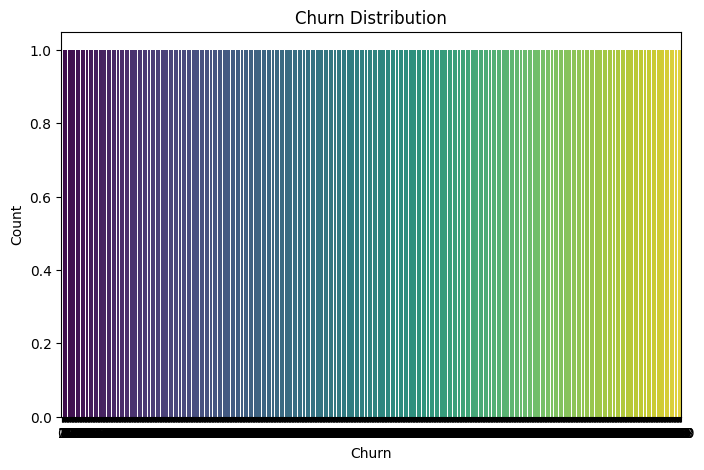

In [31]:
# 6. Data Visualizations
# Churn Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data['Churn'], palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

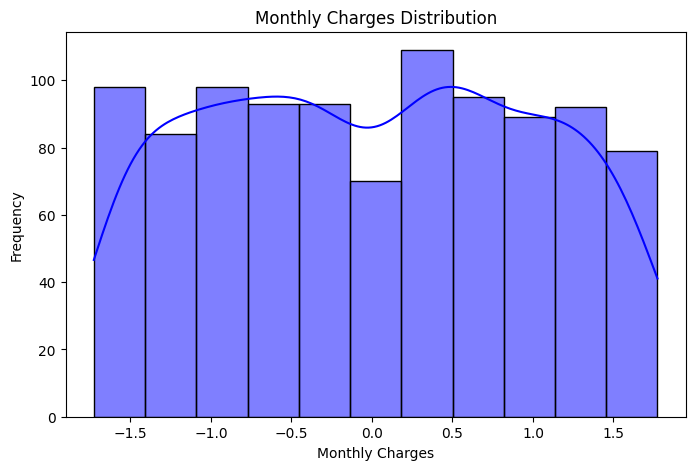

In [32]:
# Monthly Charges Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['MonthlyCharges'], kde=True, color='blue')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

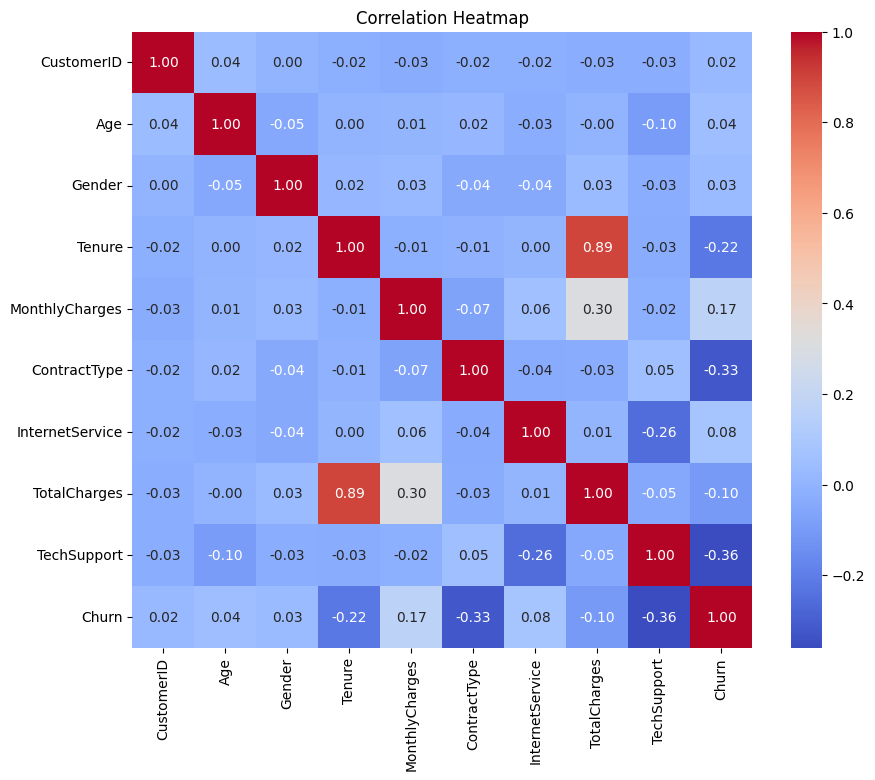

In [33]:
# Heatmap of Correlations
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

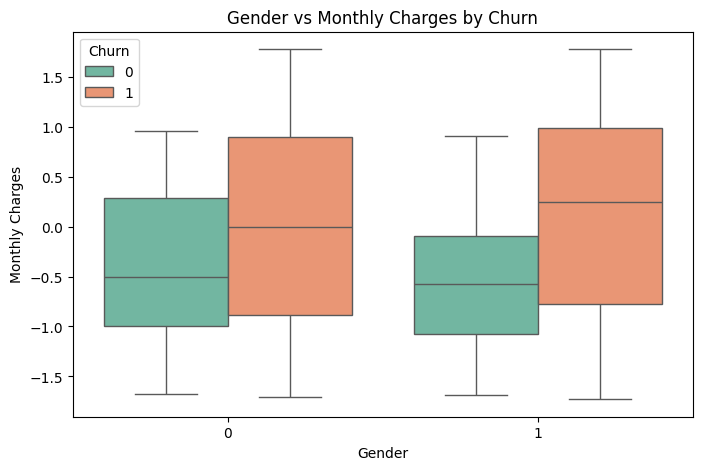

In [34]:
# Gender vs Monthly Charges by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='MonthlyCharges', hue='Churn', data=data, palette='Set2')
plt.title('Gender vs Monthly Charges by Churn')
plt.xlabel('Gender')
plt.ylabel('Monthly Charges')
plt.show()

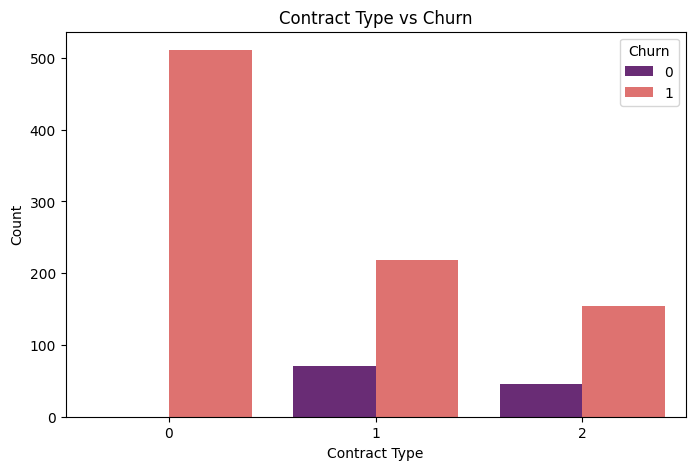

In [35]:
# Contract Type vs Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='ContractType', hue='Churn', data=data, palette='magma')
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

#### <i> Modeling </i>
#### <i> Random Forest </i>

In [36]:
# 7. Classification Algorithms
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Results:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", rf_accuracy)

Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.0


#### <i> Support Vector Machine </i>

In [37]:
# Support Vector Machine
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print("\nSupport Vector Machine Results:")
print(classification_report(y_test, svc_predictions))
print("Accuracy:", svc_accuracy)


Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.94      0.98      0.96       177

    accuracy                           0.92       200
   macro avg       0.83      0.73      0.77       200
weighted avg       0.91      0.92      0.91       200

Accuracy: 0.92


#### <i> Logistic Regression </i>

In [38]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_predictions))
print("Accuracy:", lr_accuracy)


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.94      0.98      0.96       177

    accuracy                           0.92       200
   macro avg       0.83      0.73      0.77       200
weighted avg       0.91      0.92      0.91       200

Accuracy: 0.92


#### <i> Confusion Matrics </i>

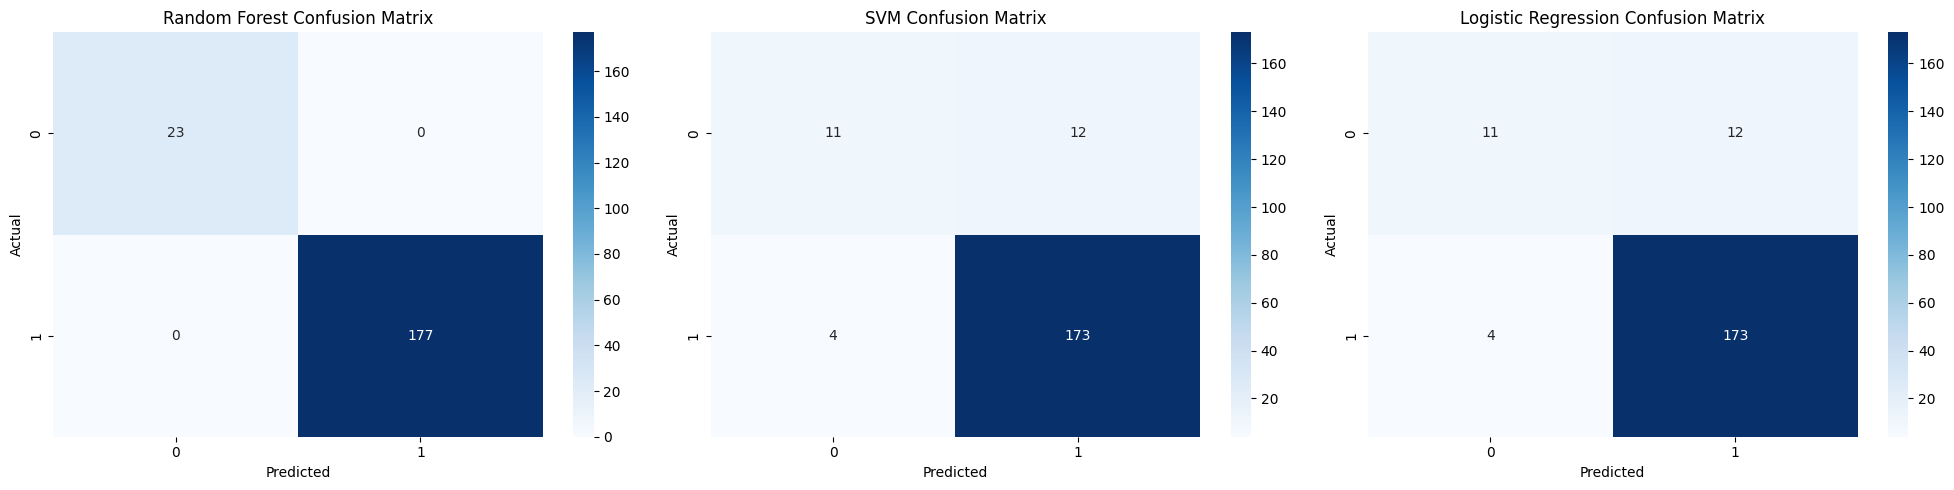

In [39]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

cm_svc = confusion_matrix(y_test, svc_predictions)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('SVM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

cm_lr = confusion_matrix(y_test, lr_predictions)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Logistic Regression Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


#### <i> Compare Models </i>

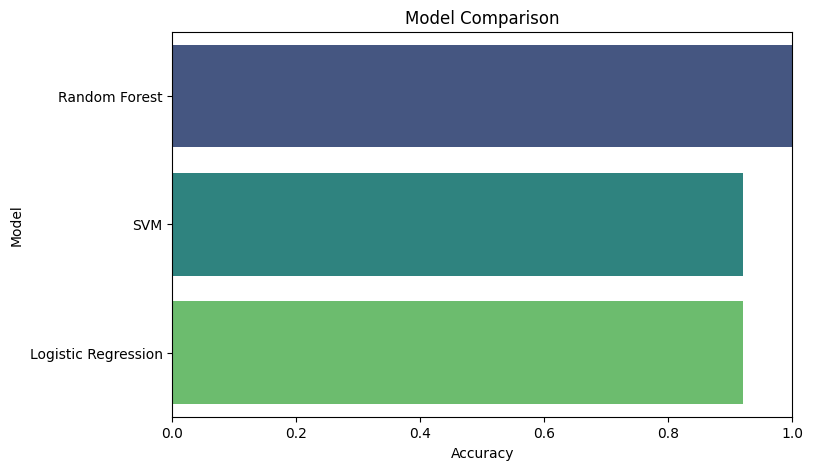

In [40]:
# 8. Compare Models
model_results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svc_accuracy, lr_accuracy]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Accuracy', y='Model', data=model_results, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()